In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier

In [2]:
data = pd.read_csv('./data/top_personality/2018-personality-data.csv')

# column 빈칸 제거
new_col =[col.strip() for col in data.columns] 

data.columns = new_col

In [3]:
data = data.drop(['userid',
                  'movie_1', 'predicted_rating_1',
                  'movie_2', 'predicted_rating_2',
                  'movie_3', 'predicted_rating_3',
                  'movie_4', 'predicted_rating_4',
                  'movie_5', 'predicted_rating_5',
                  'movie_6', 'predicted_rating_6',
                  'movie_7', 'predicted_rating_7',
                  'movie_8', 'predicted_rating_8',
                  'movie_9', 'predicted_rating_9',
                  'movie_10', 'predicted_rating_10',
                  'movie_11', 'predicted_rating_11',
                  'movie_12', 'predicted_rating_12',
                  ], axis=1)
data

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,4
1,7.0,4.0,6.0,5.5,4.0,all,default,2,3
2,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,2
3,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,3
4,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,3
...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,popularity,low,3,3
1830,4.0,3.5,4.5,4.0,2.5,serendipity,high,3,4
1831,6.0,3.0,5.5,3.5,6.0,serendipity,low,3,4
1832,5.0,3.5,1.5,3.5,2.5,serendipity,medium,4,4


In [4]:
data

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,4
1,7.0,4.0,6.0,5.5,4.0,all,default,2,3
2,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,2
3,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,3
4,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,3
...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,popularity,low,3,3
1830,4.0,3.5,4.5,4.0,2.5,serendipity,high,3,4
1831,6.0,3.0,5.5,3.5,6.0,serendipity,low,3,4
1832,5.0,3.5,1.5,3.5,2.5,serendipity,medium,4,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   openness             1834 non-null   float64
 1   agreeableness        1834 non-null   float64
 2   emotional_stability  1834 non-null   float64
 3   conscientiousness    1834 non-null   float64
 4   extraversion         1834 non-null   float64
 5   assigned metric      1834 non-null   object 
 6   assigned condition   1834 non-null   object 
 7   is_personalized      1834 non-null   int64  
 8   enjoy_watching       1834 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 129.1+ KB


In [6]:
data[data['assigned condition']== ' default']

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching
1,7.0,4.0,6.0,5.5,4.0,all,default,2,3
22,7.0,4.0,5.0,5.0,3.5,all,default,4,4
23,5.0,4.0,2.0,2.5,1.5,all,default,2,2
26,6.0,4.0,5.5,4.0,3.5,all,default,4,2
41,4.0,2.5,4.0,4.5,3.0,all,default,2,3
...,...,...,...,...,...,...,...,...,...
1784,6.5,4.5,6.0,4.0,6.0,all,default,5,5
1791,6.5,6.0,4.0,4.0,3.0,all,default,4,4
1797,6.0,4.0,4.0,4.0,3.0,all,default,3,4
1810,6.5,5.0,5.0,4.5,4.5,all,default,4,4


In [7]:
# assigned condition 할당 안된 데이터 제거

data = data[data['assigned metric'] !=' all']
data

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,4
2,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,2
3,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,3
4,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,3
5,6.0,3.0,4.0,3.5,1.5,popularity,medium,2,4
...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,popularity,low,3,3
1830,4.0,3.5,4.5,4.0,2.5,serendipity,high,3,4
1831,6.0,3.0,5.5,3.5,6.0,serendipity,low,3,4
1832,5.0,3.5,1.5,3.5,2.5,serendipity,medium,4,4


## personality EDA

TypeError: Invalid shape (1626,) for image data

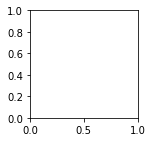

In [8]:
personality = ['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0,hspace=0,wspace=0.05)

for idx, n in enumerate(personality):
    ax = fig.add_subplot(1,5,idx+1)
    ax.imshow(data[n])
    
plt.show()

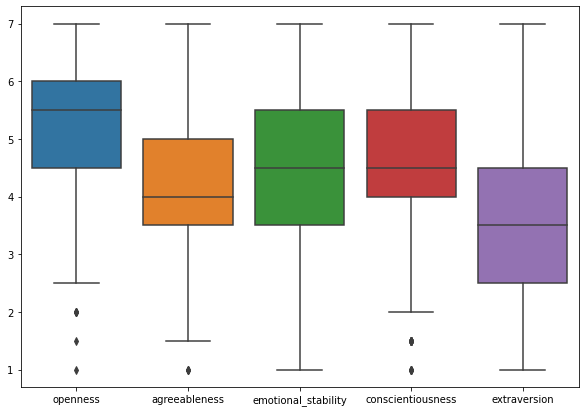

In [9]:
plt.figure(figsize=(10, 7 ))
sns.boxplot(data=data[personality]);

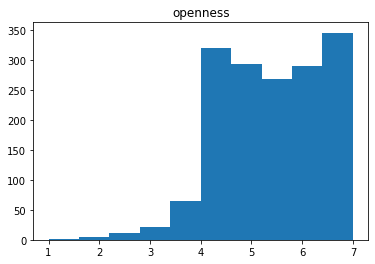

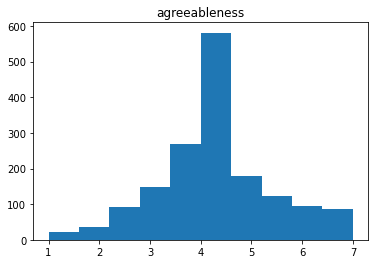

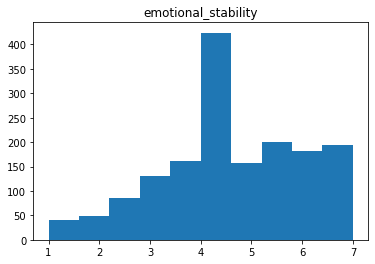

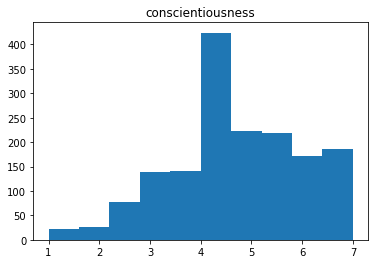

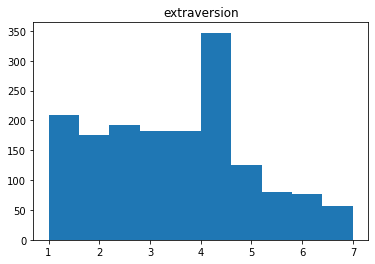

In [10]:
personality = ['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']

for i in personality:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

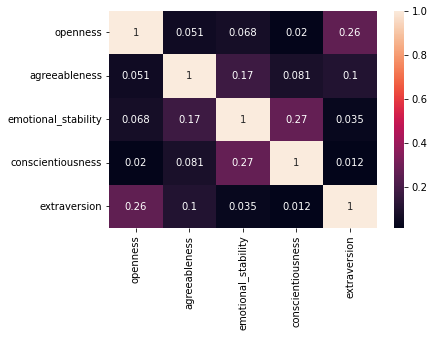

In [11]:
sns.heatmap(data[personality].corr(), annot = True)

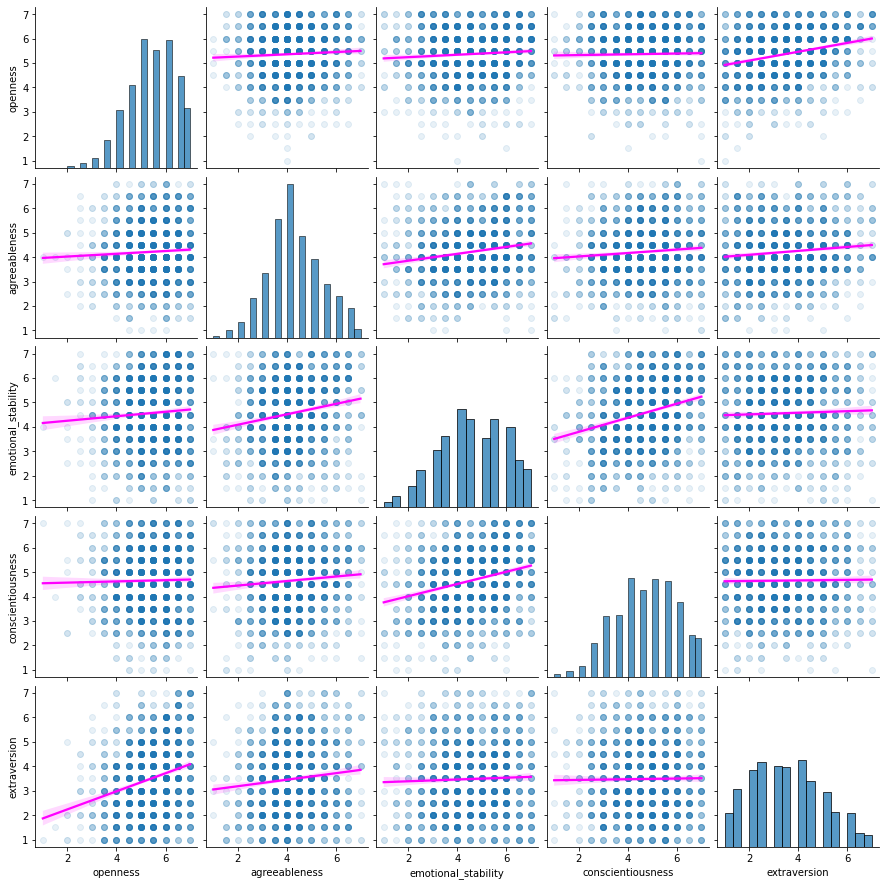

In [12]:
sns.pairplot(data[personality], kind='reg', plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

## Encoding

In [13]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'assigned metric': [' serendipity', ' popularity', ' diversity'],
 'assigned condition': [' high', ' medium', ' low']}

In [14]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

tmp_data = onehot_encode(data, 'assigned metric', 'metric')
tmp_data = onehot_encode(tmp_data, 'assigned condition', 'metric')

In [44]:
tmp_data

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,is_personalized,enjoy_watching,metric_ diversity,metric_ popularity,metric_ serendipity,metric_ high,metric_ low,metric_ medium,label
0,5.0,2.0,3.0,2.5,6.5,4,4,0,0,1,1,0,0,1
2,4.0,3.0,4.5,2.0,2.5,2,2,0,0,1,0,0,1,-1
3,5.5,5.5,4.0,4.5,4.0,3,3,0,1,0,0,0,1,0
4,5.5,5.5,3.5,4.5,2.5,2,3,0,1,0,0,0,1,-1
5,6.0,3.0,4.0,3.5,1.5,2,4,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,3,3,0,1,0,0,1,0,0
1830,4.0,3.5,4.5,4.0,2.5,3,4,0,0,1,1,0,0,1
1831,6.0,3.0,5.5,3.5,6.0,3,4,0,0,1,0,1,0,1
1832,5.0,3.5,1.5,3.5,2.5,4,4,0,0,1,0,0,1,1


In [45]:
label_values = []
tmp_label = (tmp_data['is_personalized'] + tmp_data['enjoy_watching']) / 2
def labeling(x):
    if x >= 3:
        return 1
    elif x < 3:
        return 0
  #  else:
  #      return 0

for i in tmp_label:
    label_values.append(labeling(i))
    
label_values

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [46]:
tmp_data['label'] = label_values
tmp_data

df = tmp_data.drop(['is_personalized', 'enjoy_watching'], axis=1)
df

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,metric_ diversity,metric_ popularity,metric_ serendipity,metric_ high,metric_ low,metric_ medium,label
0,5.0,2.0,3.0,2.5,6.5,0,0,1,1,0,0,1
2,4.0,3.0,4.5,2.0,2.5,0,0,1,0,0,1,0
3,5.5,5.5,4.0,4.5,4.0,0,1,0,0,0,1,1
4,5.5,5.5,3.5,4.5,2.5,0,1,0,0,0,1,0
5,6.0,3.0,4.0,3.5,1.5,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,0,1,0,0,1,0,1
1830,4.0,3.5,4.5,4.0,2.5,0,0,1,1,0,0,1
1831,6.0,3.0,5.5,3.5,6.0,0,0,1,0,1,0,1
1832,5.0,3.5,1.5,3.5,2.5,0,0,1,0,0,1,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1833
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   openness             1626 non-null   float64
 1   agreeableness        1626 non-null   float64
 2   emotional_stability  1626 non-null   float64
 3   conscientiousness    1626 non-null   float64
 4   extraversion         1626 non-null   float64
 5   metric_ diversity    1626 non-null   uint8  
 6   metric_ popularity   1626 non-null   uint8  
 7   metric_ serendipity  1626 non-null   uint8  
 8   metric_ high         1626 non-null   uint8  
 9   metric_ low          1626 non-null   uint8  
 10  metric_ medium       1626 non-null   uint8  
 11  label                1626 non-null   int64  
dtypes: float64(5), int64(1), uint8(6)
memory usage: 98.4 KB


In [48]:
X = df.drop('label', axis=1)
y = df['label']

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# modeling

In [50]:
# 모델 설정
log_model = LogisticRegression() 
svm_model = SVC(C=1.0)
rf_model = RandomForestClassifier()
xgb_model = XGBRegressor()
lgbm_model = LGBMClassifier()

# 학습
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train) 
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# 성과
log_acc = log_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)
rf_acc = rf_model.score(X_test, y_test)
xgb_acc = xgb_model.score(X_test, y_test)
lgbm_acc = lgbm_model.score(X_test, y_test)

In [81]:
print('<Logistic>')
print_clf_evel(y_test, log_model.predict(X_test))
print('*'*100)
print('<SVM>')
print_clf_evel(y_test, svm_model.predict(X_test))
print('*'*100)
print('<RandomForest>')
print_clf_evel(y_test, rf_model.predict(X_test))
print('*'*100)
#print_clf_evel(y_test, xgb_model.predict(X_test))
print('<LGBM>')
print_clf_evel(y_test, lgbm_model.predict(X_test))

<Logistic>
=> confusion matrix
[[  0 141]
 [  1 346]]
Accuracy:  0.7090, Precision: 0.7105
Recall:  0.9971, F1: 0.8297, AUC:0.4986
****************************************************************************************************
<SVM>
=> confusion matrix
[[  0 141]
 [  0 347]]
Accuracy:  0.7111, Precision: 0.7111
Recall:  1.0000, F1: 0.8311, AUC:0.5000
****************************************************************************************************
<RandomForest>
=> confusion matrix
[[ 11 130]
 [ 32 315]]
Accuracy:  0.6680, Precision: 0.7079
Recall:  0.9078, F1: 0.7955, AUC:0.4929
****************************************************************************************************
<LGBM>
=> confusion matrix
[[ 15 126]
 [ 51 296]]
Accuracy:  0.6373, Precision: 0.7014
Recall:  0.8530, F1: 0.7698, AUC:0.4797


In [58]:
lgbm_model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [59]:
mean_absolute_error(y_test, log_model.predict(X_test))

0.29098360655737704

In [60]:
y_test.value_counts()

1    347
0    141
Name: label, dtype: int64

In [63]:
confusion_matrix(lgbm_model.predict(X_test), y_test)

array([[ 15,  51],
       [126, 296]], dtype=int64)

In [64]:
confusion_matrix(y_test, log_model.predict(X_test))

SyntaxError: EOL while scanning string literal (CreatorTemp/ipykernel_22992/3498357451.py, line 1)

In [65]:
a = list(rf_model.feature_importances_)
b = list(X_train.columns)

pair = [pair for pair in zip(a, b)]
pd.DataFrame(pair)

,0,1
0,0.160144,openness
1,0.162938,agreeableness
2,0.179797,emotional_stability
3,0.173491,conscientiousness
4,0.181179,extraversion
5,0.023534,metric_ diversity
6,0.023870,metric_ popularity
7,0.022826,metric_ serendipity
8,0.023090,metric_ high
9,0.025325,metric_ low


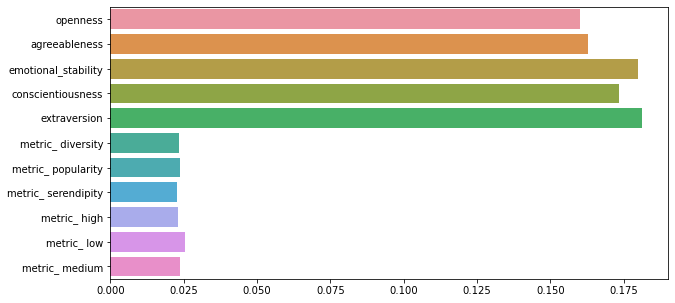

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(rf_model.feature_importances_), y=list(X_train.columns))
plt.show();

In [67]:
lgbm_model.feature_importances_

array([453, 443, 511, 533, 515,  67, 114,  98,  92, 111,  63])

In [68]:
len(X_train.columns)
len(lgbm_model.feature_importances_)
type(lgbm_model.feature_importances_)

numpy.ndarray

In [69]:
lgbm_model.feature_importances_
X_train.columns

pd.DataFrame(lgbm_model.feature_importances_, columns=X_train.columns )

ValueError: Shape of passed values is (11, 1), indices imply (11, 11)

In [70]:
pred = xgb_model.
confusion_matrix(pred, y_test)

SyntaxError: invalid syntax (CreatorTemp/ipykernel_22992/2652038026.py, line 1)

In [71]:
xgb_acc

-0.4015920128197361

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc



def print_clf_evel(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('='*15)
    
    print('Accuracy: {0: .4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0: .4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [72]:
fig = px.bar(
    x=['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'XGBoost', 'LightGBM'],
    y=[log_acc, svm_acc, rf_acc, xgb_acc, lgbm_acc],
    color=['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'XGBoost', 'LightGBM'],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy"
)

fig.show()

In [40]:
print("Logistic Regression:", log_acc)
print("Support Vector Machine:", svm_acc)
print("Neural Network:", rf_acc)
print("Neural Network:", xgb_acc)
print("Neural Network:", lgbm_acc)

Logistic Regression: 0.5737704918032787
Support Vector Machine: 0.5778688524590164
Neural Network: 0.5307377049180327
Neural Network: -0.38148543330554463
Neural Network: 0.48770491803278687


## clustering

In [93]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[personality])
df_scaled

array([[-0.35529392, -1.94520104, -1.11538508, -1.65397706,  2.05412372],
       [-1.32786615, -1.06674058, -0.04245106, -2.03767898, -0.66630403],
       [ 0.1309922 ,  1.12941058, -0.40009573, -0.11916941,  0.35385638],
       ...,
       [ 0.61727832, -1.06674058,  0.67283829, -0.88657324,  1.71407025],
       [-0.35529392, -0.62751035, -2.18831911, -0.88657324, -0.66630403],
       [ 1.10356443,  2.00787104, -1.47302976,  1.41563824, -1.0063575 ]])

In [174]:
# define cluster algorithm
n_cl = 3
kmeans = KMeans(init="random", n_clusters=n_cl, n_init=10, max_iter=300, random_state=99)
# and run it
kmeans.fit(df_scaled)

KMeans(init='random', n_clusters=3, random_state=99)

In [175]:
kmeans.cluster_centers_

array([[ 0.62740928,  0.48803461,  0.62474592,  0.460017  ,  0.63401406],
       [ 0.22985257, -0.41352639, -0.8428939 , -0.72564332,  0.08480308],
       [-0.82748478, -0.05778418,  0.23614896,  0.27773963, -0.69032955]])

In [176]:
kmeans.labels_.astype('object')

array([1, 1, 0, ..., 0, 1, 0], dtype=object)

In [186]:
# append cluster variable
df_cluster = df.copy()
df_cluster['cluster'] = kmeans.labels_.astype('object')

In [195]:
df4pca = df_cluster[personality]

# standardize first
df4pca_std = StandardScaler().fit_transform(df4pca)

# define 3D PCA
pc_model = PCA(n_components=3)

# apply PCA
pc = pc_model.fit_transform(df4pca_std)

# convert to data frame
df_pc = pd.DataFrame(data = pc, columns = ['pc_1', 'pc_2', 'pc_3'])

# add origin column
df_pc['cluster'] = df_cluster.cluster

# and look at result
df_pc.head()

,pc_1,pc_2,pc_3,cluster
0,1.537875,2.314749,-0.725714,1
1,2.187510,-0.104572,0.403963,NaN
2,-0.416414,0.401279,0.998401,1
3,0.179883,-0.053374,1.046276,0
4,1.373959,0.194253,-0.638035,1


In [198]:
len(df_pc)

1626

In [199]:
len(df_cluster)

1626

In [197]:
# add PCA data to original data frame, so we have all data in one place
df_cluster['pc_1'] = df_pc.pc_1
df_cluster['pc_2'] = df_pc.pc_2
df_cluster['pc_3'] = df_pc.pc_3
df_cluster.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,metric_ diversity,metric_ popularity,metric_ serendipity,metric_ high,metric_ low,metric_ medium,label,cluster,pc_1,pc_2,pc_3
0,5.0,2.0,3.0,2.5,6.5,0,0,1,1,0,0,1,1,1.537875,2.314749,-0.725714
2,4.0,3.0,4.5,2.0,2.5,0,0,1,0,0,1,-1,1,-0.416414,0.401279,0.998401
3,5.5,5.5,4.0,4.5,4.0,0,1,0,0,0,1,0,0,0.179883,-0.053374,1.046276
4,5.5,5.5,3.5,4.5,2.5,0,1,0,0,0,1,-1,1,1.373959,0.194253,-0.638035
5,6.0,3.0,4.0,3.5,1.5,0,1,0,0,0,1,0,1,-0.407940,-0.761368,-0.127534


In [208]:
df_cluster['userid'] = data['userid']
df_cluster['enjoy_watching'] = data['enjoy_watching']
df_cluster

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,metric_ diversity,metric_ popularity,metric_ serendipity,metric_ high,metric_ low,metric_ medium,label,cluster,pc_1,pc_2,pc_3,userid,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,0,0,1,1,0,0,1,1,1.537875,2.314749,-0.725714,8e7cebf9a234c064b75016249f2ac65e,4
2,4.0,3.0,4.5,2.0,2.5,0,0,1,0,0,1,-1,1,-0.416414,0.401279,0.998401,b7e8a92987a530cc368719a0e60e26a3,2
3,5.5,5.5,4.0,4.5,4.0,0,1,0,0,0,1,0,0,0.179883,-0.053374,1.046276,92561f21446e017dd6b68b94b23ad5b7,3
4,5.5,5.5,3.5,4.5,2.5,0,1,0,0,0,1,-1,1,1.373959,0.194253,-0.638035,030001ac2145a938b07e686a35a2d638,3
5,6.0,3.0,4.0,3.5,1.5,0,1,0,0,0,1,0,1,-0.407940,-0.761368,-0.127534,f91b2fb085d0feb47b86fc81b10207ee,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,0,1,0,0,1,0,0,1,NaN,NaN,NaN,cff910b71f09b3120289ff6b461a9e03,3
1830,4.0,3.5,4.5,4.0,2.5,0,0,1,1,0,0,1,2,NaN,NaN,NaN,1ab3a4c2921d8da640854819b0f6cfce,4
1831,6.0,3.0,5.5,3.5,6.0,0,0,1,0,1,0,1,0,NaN,NaN,NaN,a06386edadf3bc614dadb7044708c46c,4
1832,5.0,3.5,1.5,3.5,2.5,0,0,1,0,0,1,1,1,NaN,NaN,NaN,bad56d9506832cd79d874a6b66b3d813,4


In [231]:
data

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,...,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,...,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,...,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,...,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [249]:
movie[movie['movieId'] == 3435]

,movieId,title,genres
3339,3435,Double Indemnity (1944),Crime|Drama|Film-Noir


In [234]:
movie =  pd.read_csv('./data/movies.csv')
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
